In [169]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, f1_score

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data = pd.read_csv('Women_s_E-Commerce_Clothing_Reviews_1594_1.csv',sep=';', on_bad_lines='skip')
data.drop('Unnamed: 0', axis = 1, inplace  =True)

In [3]:
data.head()

,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing.ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review.Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended.IND          23486 non-null  int64 
 6   Positive.Feedback.Count  23486 non-null  int64 
 7   Division.Name            23472 non-null  object
 8   Department.Name          23472 non-null  object
 9   Class.Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
print('Column\t\tMissing Count')
print("**"*20)
print(data.isna().sum())
print("**"*20)
print(data.isna().sum().sum())

Column		Missing Count
****************************************
Clothing.ID                   0
Age                           0
Title                      3810
Review.Text                 845
Rating                        0
Recommended.IND               0
Positive.Feedback.Count       0
Division.Name                14
Department.Name              14
Class.Name                   14
dtype: int64
****************************************
4697


In [6]:
print('Column\t\t\tMissing %')
print("**"*20)
print(round(data.isna().sum() / data.shape[0]*100,2))
print("**"*20)

Column			Missing %
****************************************
Clothing.ID                 0.00
Age                         0.00
Title                      16.22
Review.Text                 3.60
Rating                      0.00
Recommended.IND             0.00
Positive.Feedback.Count     0.00
Division.Name               0.06
Department.Name             0.06
Class.Name                  0.06
dtype: float64
****************************************


In [7]:
#dropping NaN
data.dropna(inplace= True)

In [8]:
print('Column\t\t\tMissing %')
print("**"*20)
print(round(data.isna().sum() / data.shape[0]*100,2))
print("**"*20)

Column			Missing %
****************************************
Clothing.ID                0.0
Age                        0.0
Title                      0.0
Review.Text                0.0
Rating                     0.0
Recommended.IND            0.0
Positive.Feedback.Count    0.0
Division.Name              0.0
Department.Name            0.0
Class.Name                 0.0
dtype: float64
****************************************


In [20]:
cols = {'Clothing.ID' : "Id",
       'Review.Text' : "Review",
       'Recommended.IND' : 'Recommended',
       'Positive.Feedback.Count' : 'Count',
       'Division.Name' : 'Division',
       'Department.Name' : 'Dept',
       'Class.Name' : 'Class'}
data.rename(columns=cols, inplace= True)
data.reset_index(drop= True, inplace= True)

In [21]:
data.head()

,Id,Age,Title,Review,Rating,Recommended,Count,Division,Dept,Class
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


## EDA

In [11]:
num_col = [col for col in data.describe() if col != 'Id']

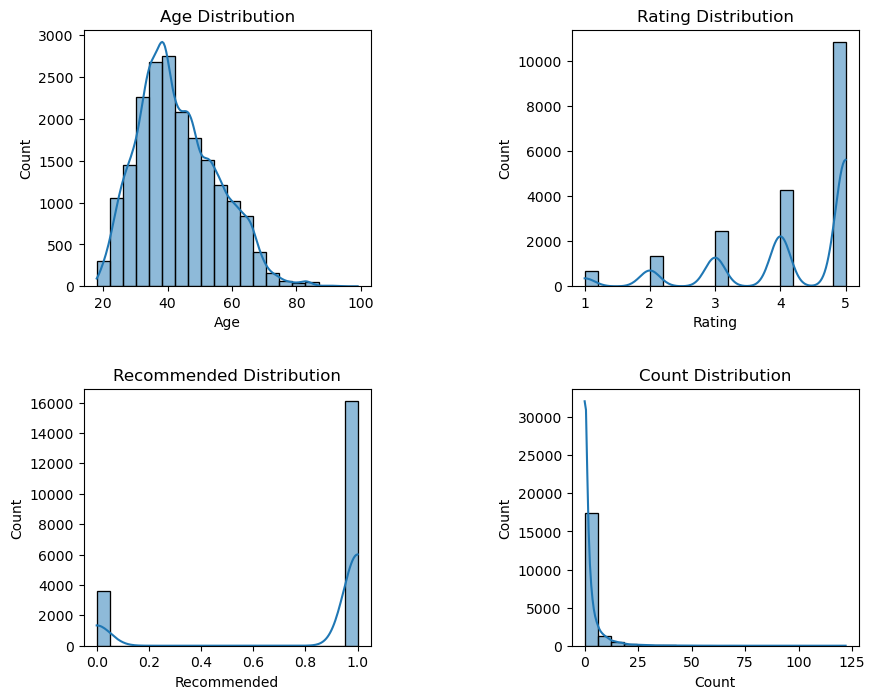

In [12]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace = .7, hspace=.4)
for i in range(len(num_col)):
    plt.subplot(len(num_col)//2,2,i+1)
    sns.histplot(data[num_col[i]], kde= True, bins= 20,)
    plt.title(f'{num_col[i]} Distribution')
plt.show()

- Recommended is Discrite variable.
- Count is skewed.
- Ratting is Ordinal variabl

- Most of the products are rated 5.

In [32]:
def bar_pie_chart(data,col):
    plt.figure(figsize=(15,5))
    plt.suptitle(f"{col} Count Distribution", fontsize = 16)
    plt.subplot(1,2,1)
    sns.countplot(x =data[col])
    plt.title(f"{col} Distribution", fontsize = 12)
    plt.xticks(rotation = 45)
    plt.subplot(1,2,2)
    plt.pie(data[col].value_counts().values, labels= data[col].value_counts().index,
            autopct= '%.1f%%',
            counterclock= False, startangle= 90, 
            explode=[0.02 for i in data[col].value_counts().index.values],
        pctdistance=0.7)
    circle = plt.Circle((0,0),radius=0.5, fc = 'white')
    fig = plt.gcf()
    plt.gca().add_artist(circle)
    plt.title(f"{col} % Distribution", fontsize = 12)
    plt.show()

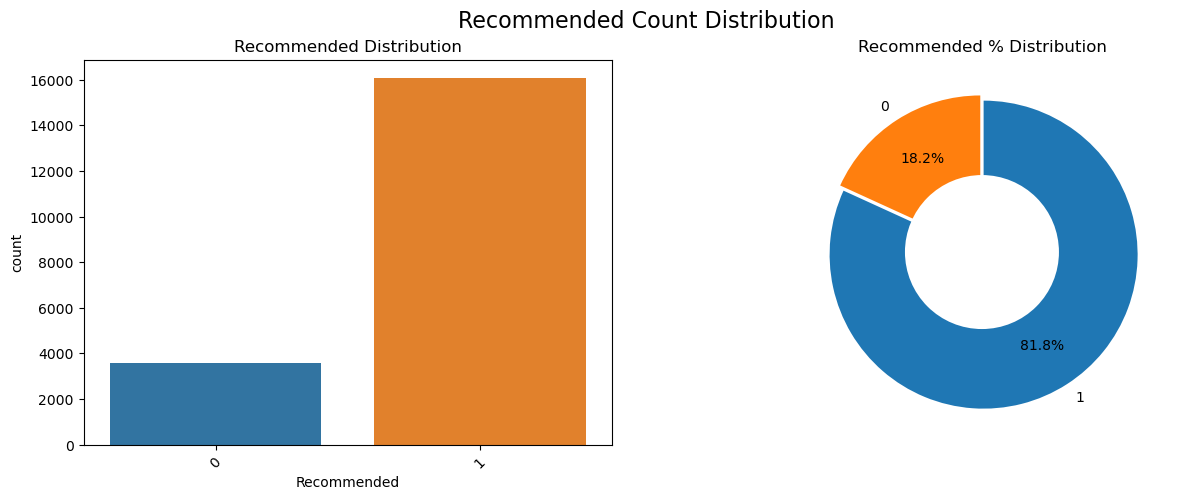

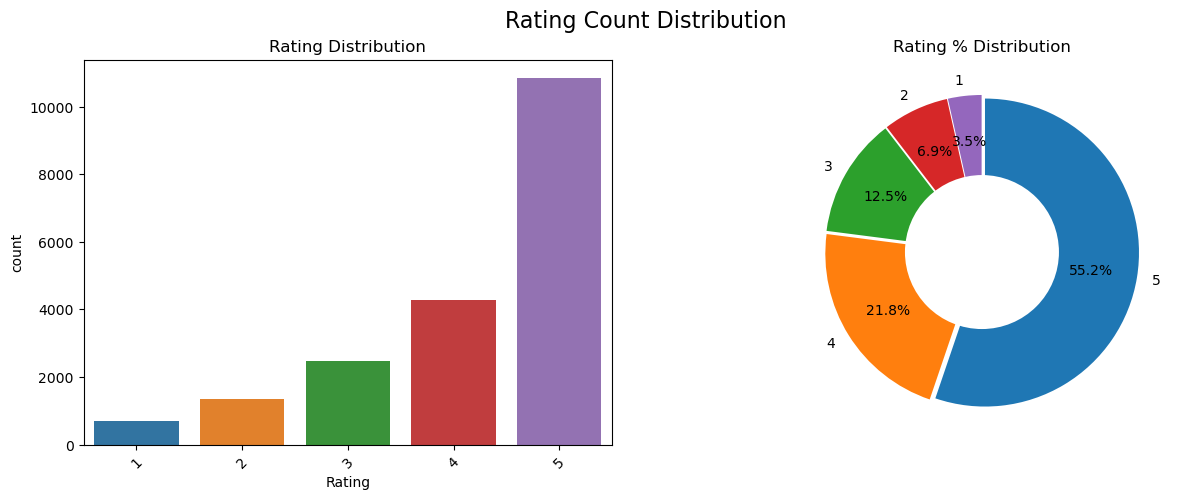

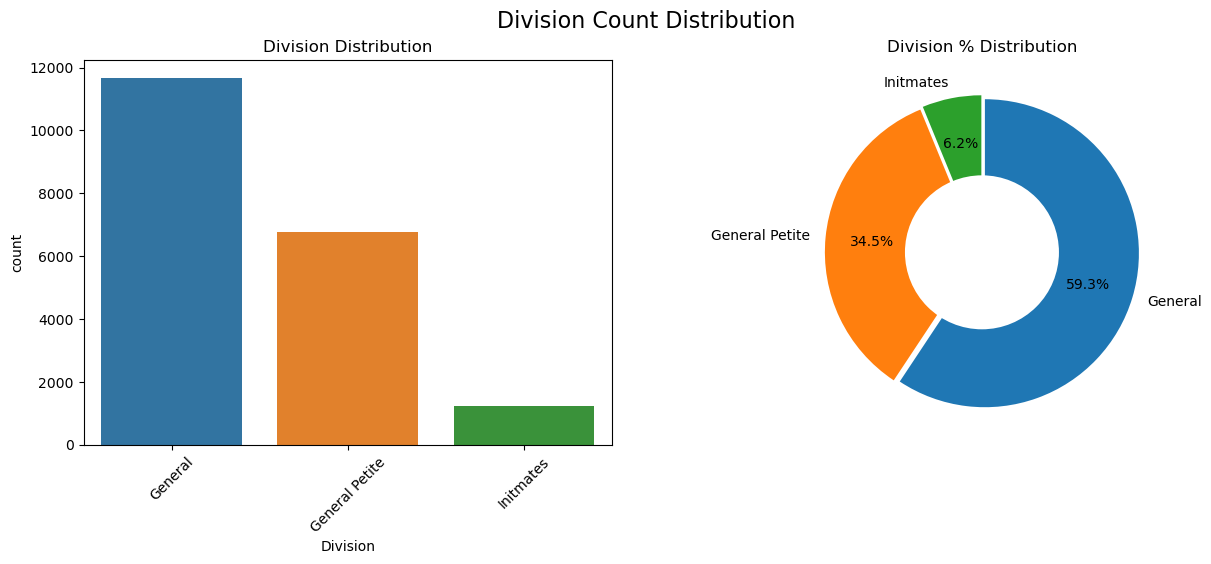

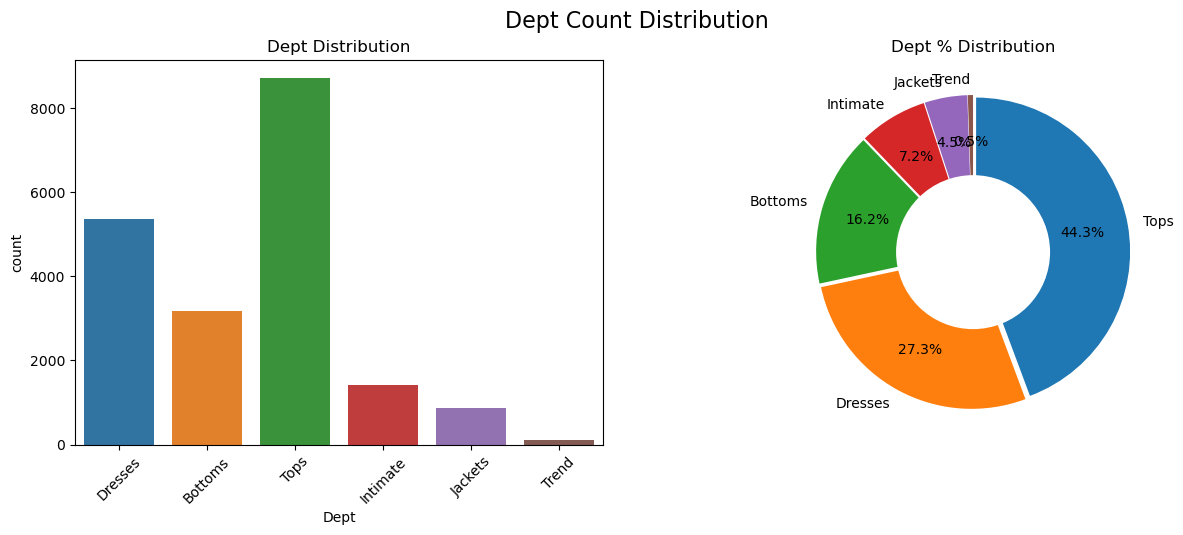

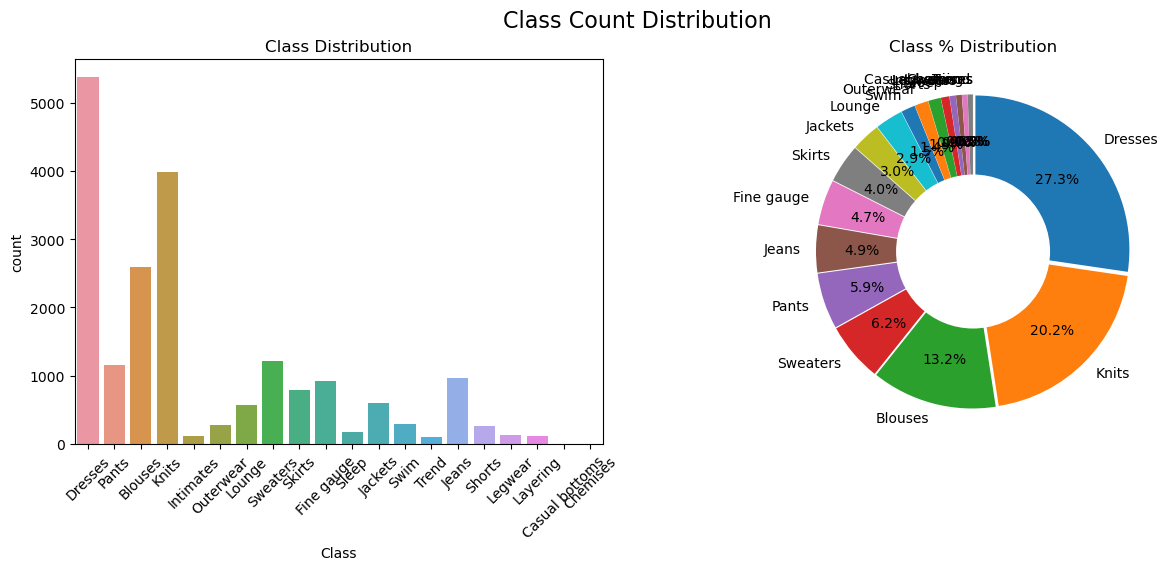

In [33]:
for col in ['Recommended','Rating','Division', 'Dept', 'Class']:
    bar_pie_chart(data,col=col)

## MODEL PREPERATION

In [56]:
X = data.drop(['Recommended', 'Id'], axis=1)
Y = data['Recommended']

In [57]:
def text_concatination(row):
    combine_text = ""
    combine_text += f"review subject {row['Title']}"
    combine_text += f" {row['Review']}"
    return combine_text

In [58]:
X['Review'] = X.apply(text_concatination, axis=1)

In [60]:
X.drop('Title', axis = 1, inplace= True)

In [136]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.apply(self._clean_text)

    def _clean_text(self, text):
        if isinstance(text, str):
            text = text.strip().lower()
            text = re.sub('[^A-Za-z0-9]', ' ', text)
            words = text.split(' ')
            lemmatizer = WordNetLemmatizer()
            STOPWORDS = set(stopwords.words('english'))
            clean_words = [lemmatizer.lemmatize(word) for word in words if word and word not in STOPWORDS]
            return ' '.join(clean_words)
        return text

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state= 42, train_size= 0.8)

In [162]:
cat_col = ['Division', 'Dept', 'Class']
num_col = ['Age', 'Rating', 'Count']
text_col = 'Review'

cat_transformer = Pipeline(

    steps= [('impute', SimpleImputer(strategy='most_frequent')),
            ('one hot', OneHotEncoder(handle_unknown= 'ignore', drop = 'first'))
            ]
)
#processing the text feature
text_transformer = Pipeline(steps=[
    ('text cleaning', TextCleaner()),
    ('tfidf', TfidfVectorizer())
])

num_transformer = StandardScaler()

processor = ColumnTransformer(transformers=[

    ('cat', cat_transformer,cat_col),
    ('text', text_transformer, text_col),
    ('num', num_transformer, num_col)
])


In [163]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [164]:
def get_model(classifier, processor = processor):
    model = Pipeline([
        ('processor', processor),
        ('classifier', classifier)

    ])

    return model

In [165]:
rf_model = get_model(rf)

In [166]:
rf_model

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Division', 'Dept',
                                                   'Class']),
                                                 ('text',
                                                  Pipeline(steps=[('text '
                                                                   'cleaning',
                                                                   TextCleaner()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'Review'),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Rating',
                                                   'Count'])])),
                ('classifier', RandomForestClassifier())])

In [167]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Division', 'Dept',
                                                   'Class']),
                                                 ('text',
                                                  Pipeline(steps=[('text '
                                                                   'cleaning',
                                                                   TextCleaner()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'Review'),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Rating',
                                                   'Count'])])),
                ('classifier', RandomForestClassifier())])

In [168]:
y_pred = rf_model.predict(X_test)

c:\Users\sayan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.73      0.81       700
           1       0.94      0.98      0.96      3233

    accuracy                           0.94      3933
   macro avg       0.93      0.86      0.89      3933
weighted avg       0.94      0.94      0.94      3933

****************************************
F1 Score:  0.96
****************************************


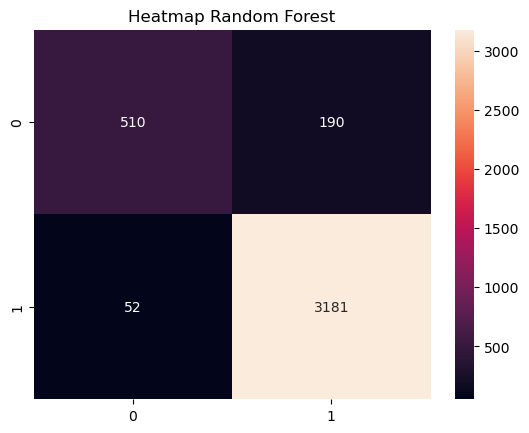

In [171]:
print(classification_report(y_test, y_pred))
print("**"*20)
print("F1 Score: ", round(f1_score(y_test,y_pred),2))
print("**"*20)
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True, fmt= '.0f')
plt.title("Heatmap Random Forest")
plt.show()

In [172]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

model_xgb = get_model(xgb)

In [173]:
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Division', 'Dept',
                                                   'Class']),
                                                 ('text',
                                                  Pipeline(steps=[('text '
                                                                   'cleaning',
                                                                   TextCleaner()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'Review'),
                                                 ('num', StandardScaler(),...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

c:\Users\sayan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       700
           1       0.97      0.97      0.97      3233

    accuracy                           0.95      3933
   macro avg       0.91      0.91      0.91      3933
weighted avg       0.95      0.95      0.95      3933

****************************************
F1 Score:  0.97
****************************************


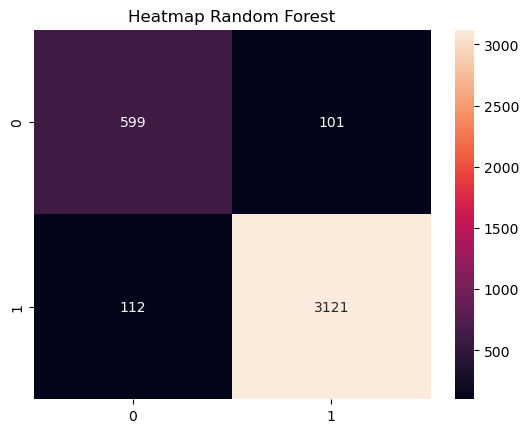

In [174]:
y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print("**"*20)
print("F1 Score: ", round(f1_score(y_test,y_pred),2))
print("**"*20)
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True, fmt= '.0f')
plt.title("Heatmap Random Forest")
plt.show()